In [4]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold 

In [5]:
## Data we will be using 
data = pd.read_csv('cleaned.csv')
data.head(5)

,Unnamed: 0,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,GenderBinary
0,0,0,33,Male,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,1
1,1,1,17,Male,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,2,35,Male,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,1
3,3,3,37,Male,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,1
4,4,4,46,Male,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,1


### t-SNE or t-distributed Stochastic Neighbor Embedding

In [6]:
### t-SNE doesnot work for the non-numeric dataset for that reason we will remove every non-numeric column
non_numeric_column = data.select_dtypes(['int','float'])
learning_model = TSNE(learning_rate=50)
tsne_transform = learning_model.fit_transform(non_numeric_column)
tsne_transform[1:4,:]
non_numeric_column['x'] = tsne_transform[:,0]
non_numeric_column['y'] = tsne_transform[:,1]
non_numeric_column = non_numeric_column.drop(['Unnamed: 0', 'index'], axis = 1)

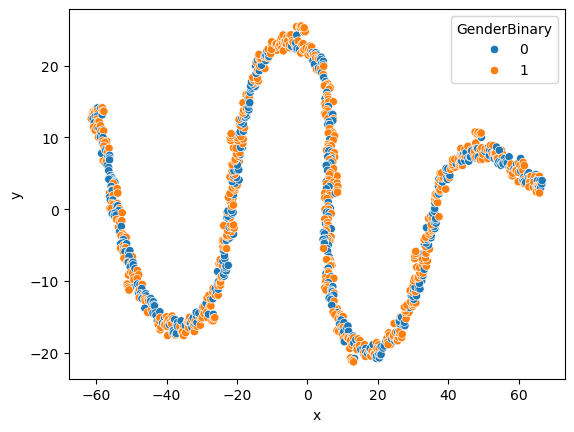

In [7]:
sns.scatterplot(x = 'x', y = 'y', data = non_numeric_column, hue = 'GenderBinary')
plt.show()

### We can conclude that the gender may have similar data profile as there is no such lineraly seperable structure

---
### How to check the variance in the whole dataset ?! 


In [11]:
### We can use the feature from sklearn library i.e. Variance Threshold in order to check the variance in the whole dataset and remove the columns or the features which doesnot meet the certain variance in the whole dataset 
print(non_numeric_column.var())
## As seen the variance of the whole dataset , we can manually remove the column or the feature which doesnot have the variance or we can let the Variance Threshold to do its work !
threshold_determiner = VarianceThreshold(threshold=0.01)
fitted_data = threshold_determiner.fit_transform(non_numeric_column)
print(fitted_data.shape)

## This helps to manually remove the column which have less or no variance !

Age                          144.131856
Air Pollution                  4.122523
Alcohol use                    6.866898
Dust Allergy                   3.923699
OccuPational Hazards           4.442843
Genetic Risk                   4.524124
chronic Lung Disease           3.417017
Balanced Diet                  4.560479
Obesity                        4.515290
Smoking                        6.229526
Passive Smoker                 5.344319
Chest Pain                     5.199355
Coughing of Blood              5.895014
Fatigue                        5.038302
Weight Loss                    4.868844
Shortness of Breath            5.221622
Wheezing                       4.169440
Swallowing Difficulty          5.154639
Clubbing of Finger Nails       5.702774
Frequent Cold                  3.358062
Dry Cough                      4.157549
Snoring                        2.174699
GenderBinary                   0.240637
x                           1229.257202
y                            158.367981


---
### Pairwise Correlation 


                               Age  Air Pollution  Alcohol use  Dust Allergy  \
Age                       1.000000       0.099494     0.151742      0.035202   
Air Pollution             0.099494       1.000000     0.747293      0.637503   
Alcohol use               0.151742       0.747293     1.000000      0.818644   
Dust Allergy              0.035202       0.637503     0.818644      1.000000   
OccuPational Hazards      0.062177       0.608924     0.878786      0.835860   
Genetic Risk              0.073151       0.705276     0.877210      0.787904   
chronic Lung Disease      0.128952       0.626701     0.763576      0.619556   
Balanced Diet             0.004863       0.524873     0.653352      0.647197   
Obesity                   0.034337       0.601468     0.669312      0.700676   
Smoking                   0.075333       0.481902     0.547035      0.358691   
Passive Smoker            0.004908       0.606764     0.592576      0.560002   
Chest Pain                0.012864      

<Axes: >

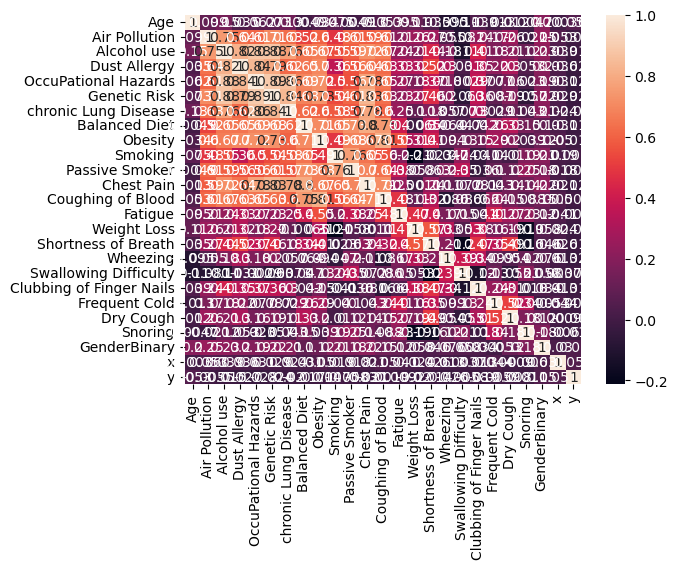

In [13]:
### Correlation is one of the most important way of deteriming the best feature in order to conclude the dimensional reduction.
### For that we just explore which data is good and bad in order to correlate 

print(non_numeric_column.corr()) ## Gives the correlation of the data with eachother
## Since it can be understood properly we can use the heatmap to visualize the whole dataset 

sns.heatmap(non_numeric_column.corr(), annot=True)

### We have to remove the highly correlated values in order to reduce the multicolinearlity in the whole dataset